## Edible or Not?: Exploring the relation between features based on the Agaricus and Lepiota Mushrooms Families
## Introduction

Mushrooms are the spore (fungi reproductive cell) bearing fruiting body of a fungus. With more than 14,000 species of mushrooms classified and over 50,000 other species, most are edible, few are actually consumed, some are 	hallucinogenic, and some are poisonous. 

With cap colours displaying the entire visible spectrum, different habitats, range of odors, stalks, veils, rings, spores, and gills the classification of mushrooms has lots of different variables. If we want to eat a mushroom taken from the wild it would be helpful to know if there exist some patterns, relations, and characteristics that can allow us to make and educated guess on the edibility of the mushroom, without risking our own health.

This project was inspired by my own curiosity that lead me to go for walks into the forests, research into fungi and ultimately, the forage and collection of wild mushrooms. 

## Data source, usefulness and ethics

With image classification via machine learning growing day by day there are many mushrooms datasets that cointain thousands of images of mushroom species. The problem with these is that the dataset do not contain the attributes of each image (mushroom) this leads to machine learning models to generalize the attributes by finding patters based on what the image portray, leading to inaccurate results/

The dataset chosen is the mushroom-classification dataset originally contributed to the UCI Machine Learning repository in the 27 April 1987, in this time period mushroom hunting was gaining popularity and thus, 23 attributes per species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom were drawn from The Audubon Society Field Guide to North American Mushrooms (1981.)

This is especially useful when trying to find hard correlations between features and mushroom edibility. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. 

This dataset is open to the public by the CC0 1.0 Universal (CC0 1.0) Public Domain Dedication License and accesible via the link: https://www.kaggle.com/uciml/mushroom-classification therefore no anonymisation of data is required. Other mushroom datasets like https://www.kaggle.com/huhao05133/mushrooms?select=Mushrooms.csv are just subsets of this one and https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images contain only images.

Any person or entity with the desire of using this data is free to do so as the dataset is open to the public, and this paper is released under the MIT License. All the analysis and conclusions are my own. Please be aware that the analysis made are purely informational and educational and the dataset does not cover all the species of mushrooms found in the wild. The results are only applicable to this and only this dataset and should not be used as a certain guide to mushroom classification.

## Aims & Objectives

* Explore the dataset to find out which attributes have the most number of variations. 
Example:
    * Are there more gill or cap colors?

* Make hypotesis based on mushroom characteristics and compare them to results obtained from the data.
Examples:
    * Are bright color mushroom poisonous?
    * Are good smelling mushroom edible? 

* Use the mushroom attributes (headers) in the dataset to find any type of correlation between them and the edibility of any given mushroom
Examples:
    * What is the realtion between the cap and gill colors in the mushrooms
    * What mushroom shape trends to be more poisonous

* Create a foraging summary that diplays the traits that make the mushroom always and most of the times edible ot poisonous
Example:
    * All x mushrooms are edible

* Find and describe flaws in the dataset and my own analysis methods

* This paper will not cover the complex inter-relations of non-generalized attributes


## Dataset, libraries import and creation of main dataframe

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]

df = pd.read_csv('./MushroomData/mushrooms.csv')
print("Imports Success")

Imports Success


## Dataset Data Exploration

Basic overview of the dataset, we have rows depicting mushrooms and columns that describe their attributes. Notice that all the data is composed of single-digit strings.

In [152]:
# Notice that all the data are single-letters
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Categories and uniqueness

Lets explore the number of categories in the dataset and plot the ones with more unique values.

This will give us insights on what attributes contain the most diversity

To do this, we will create a dataframe that contains the number of unique values in each category and plot the data

Dataframe Number of Categories: 23


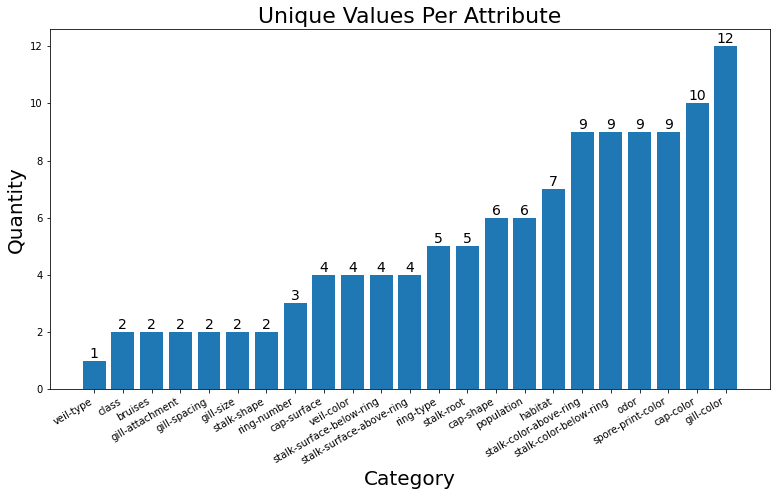

In [153]:
# 23 Unique Categories
shape =  df.shape
print(f"Dataframe Number of Categories: {shape[1]}")

# Create a df based on the description of the original
# Clean up, add attribute column, and sort by uniqueness
attributes_diversity = df.describe().T
attributes_diversity = attributes_diversity.drop(['count','top','freq'],1)
attributes_diversity['attribute'] = list(df.columns.values)
attributes_diversity = attributes_diversity.sort_values(by=['unique'])

# Get the required data
attributes_ = attributes_diversity['attribute'].tolist()
variety = attributes_diversity['unique'].tolist()

# Create the plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
UniqueValuesPlot = ax.bar(attributes_,variety)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# Add labels and title 
ax.set_xlabel("Category",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Unique Values Per Attribute',fontsize=22)

# Auto-label the number of unique values for each bar.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)

autolabel(UniqueValuesPlot) 
plt.show()

### Unique values per attribute results

* Veil-type category can be deleted as we can not do comparisons when all the mushrooms share the same value for veil-type
* As expected color related categories are the most diverse. Color based categories lead the uniqueness by having 5 places in the top 6 most diverse categories
* Unexpectly odor has quite a lot of diversity
* Next is check the health of the data (duplicates, null values)


In [154]:
# Drop the veil-type column
df.drop(['veil-type'], axis=1, inplace=True)

# Check for duplicates and null values in the data
duplicated = df.duplicated().sum()
null = df.isnull().sum()

print(f'Duplicated Rows: {duplicated} \nNull Values:\n{null}')

Duplicated Rows: 0 
Null Values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


## Data Cleaning and Editing

Due the nature of the dataset, there is no need for data cleaning. 

But to demostrate that it can be done we will add randomly generated errors in the dataset to later on fix.

* We will also change all the single-letter strings in the dataset to the word that it represents

In [155]:

# To demonstrate data cleaning on a clean dataset the function addErrors(n) adds 
# n data duplicates and adds ~(n/2) new rows with a null value in a random category

def addErrors(n):
    listOfChanges = []
    for i in range(0, n):
        # Select Random row and save it in the list of changes
        random_row = random.randint(0, len(df.index) - 1)
        selected_row = df.iloc[random_row]
        listOfChanges.append(pd.Series( selected_row, index=df.columns))
        # Have a 50/50 chance to select a random category and change a value to null
        if bool(random.getrandbits(1)):
            random_category = random.randint(0, len(df.columns) - 1)
            selected_row[random_category] = None
            listOfChanges.append(pd.Series( selected_row, index=df.columns))
    return listOfChanges
        
# append the list of changes to our original dataset
df = df.append(addErrors(1500), ignore_index=True)

duplicated = df.duplicated().sum()
null = df.isnull().sum()
print(f'\nDuplicated Rows: {duplicated} \n\nNull Values:\n{null}')



Duplicated Rows: 2220 

Null Values:
class                       107
cap-shape                    91
cap-surface                  98
cap-color                    79
bruises                      86
odor                        110
gill-attachment             109
gill-spacing                 96
gill-size                    99
gill-color                  111
stalk-shape                 102
stalk-root                  129
stalk-surface-above-ring     92
stalk-surface-below-ring     68
stalk-color-above-ring      117
stalk-color-below-ring      126
veil-color                  138
ring-number                 122
ring-type                   152
spore-print-color           102
population                  111
habitat                     122
dtype: int64


Note all the null values and duplicated rows

Now lets clean the errors integrated in the last step

In [156]:
# Drop all the rows with duplicates and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

duplicated = df.duplicated().sum()
null = df.isnull().sum()
print(f'\nDuplicated Rows: {duplicated} \n\nNull Values:\n{null}')


Duplicated Rows: 0 

Null Values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


### Change all the single-letter strings in the dataset to the word that it represents

Each letter in the dataset represent a word. The dictionary of this letters is given in the kaggle site in the details section. I tried to web-scrape the data but kaggle has strict anti-web-scraping techniques that keeps webscrappers out.

The attributes dict was directly taken from the kaggle site and formated into a simpe python dictionary

To edit all the dataset I first needed each attribution description separated by letter and corresponding word but instead I had a string per key

The following code converts every description in the attributes dictionary into and array of words by replacing characters and then splitting the word. 
Then loops over all the mushrooms and edits each letter of its attributes to the corresponding letter in the attribute dictionary.
Only downsize is that the running time is θ(n^3). The cells averages ~20 sec to run



In [157]:

# Dict taken from the https://www.kaggle.com/uciml/mushroom-classification dataset detail
# Tried to scrape the data but kaggle has anti-webscrape features
attributes_dict = {
    'class': 'edible=e,poisonous=p',
    'cap-shape': 'bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s',
    'cap-surface': 'fibrous=f,grooves=g,scaly=y,smooth=s',
    'cap-color': 'brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y',
    'bruises': 'bruises=t,no=f',
    'odor': 'almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s',
    'gill-attachment': 'attached=a,descending=d,free=f,notched=n',
    'gill-spacing': 'close=c,crowded=w,distant=d',
    'gill-size': 'broad=b,narrow=n',
    'gill-color': 'black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y',
    'stalk-shape': 'enlarging=e,tapering=t',
    'stalk-root': 'bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?',
    'stalk-surface-above-ring': 'fibrous=f,scaly=y,silky=k,smooth=s',
    'stalk-surface-below-ring': 'fibrous=f,scaly=y,silky=k,smooth=s',
    'stalk-color-above-ring': 'brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y',
    'stalk-color-below-ring': 'brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y',
    'veil-type': 'partial=p,universal=u',
    'veil-color': 'brown=n,orange=o,white=w,yellow=y',
    'ring-number': 'none=n,one=o,two=t',
    'ring-type': 'cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z',
    'spore-print-color': 'black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y',
    'population': 'abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y',
    'habitat': 'grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'
}

# Tranform a phrase array into array of words
def convert(lst):
    return list(lst[0].split())

# convert description strings into arrays. Example: 'edible=e' to ['edible','e']
for category in attributes_dict:
    attributes_dict[category] = convert([attributes_dict[category].replace(",", " ").replace('=', " ")])

# Get all the attributes name that also are the keys for the attributes_dict
column_headers = list(df.columns.values)

# θ(n^3) sorry :( Loop over all the rows, columns and see the element is in each description 
# of the dict, then set the appropiate value. (the name is in the previous index ['edible','e'])
for index in df.index:
    for category in column_headers:
        arr = attributes_dict[category]
        if df.loc[index,category] in arr:
            name = arr[arr.index(df.loc[index,category]) - 1]
            df.loc[index,category] = name

# See changes takes ~20 sec cell runtime
print(df.head(4).T)

                                  0          2          3           4
class                     poisonous     edible  poisonous      edible
cap-shape                    convex       bell     convex      convex
cap-surface                  smooth     smooth      scaly      smooth
cap-color                     brown      white      white        gray
bruises                     bruises    bruises    bruises          no
odor                        pungent      anise    pungent        none
gill-attachment                free       free       free        free
gill-spacing                  close      close      close     crowded
gill-size                    narrow      broad     narrow       broad
gill-color                    black      brown      brown       black
stalk-shape               enlarging  enlarging  enlarging    tapering
stalk-root                    equal       club      equal       equal
stalk-surface-above-ring     smooth     smooth     smooth      smooth
stalk-surface-below-

Now the dataset is much easier to read, there is no need to refer back to the kaggle site to figure out what a certain letter means in a random category

### Poisonous Vs Edible Counts in Dataset

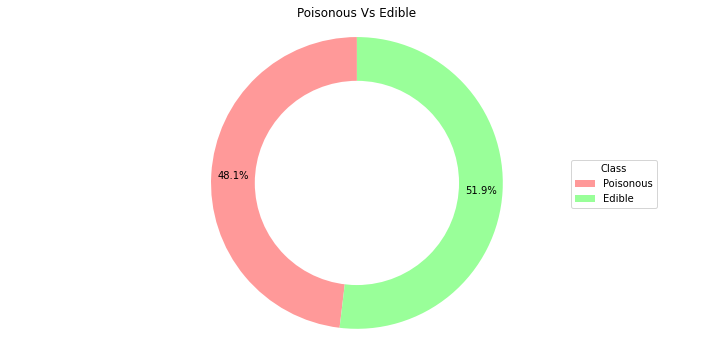

In [158]:
# Poisonous Vs Edible
# Labels, Colors, Data
labels = ['Poisonous', 'Edible',]
colors = ['#ff9999','#99ff99']
count = [len(df[df['class'] == 'poisonous']),len(df[df['class'] == 'edible'])]

# Plot the data
fig1, ax1 = plt.subplots()
ax1.pie(count, colors=colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

# Set Title and Labels
ax1.set_title("Poisonous Vs Edible")
ax1.legend(labels,
          title="Class",
          loc="center left",
          bbox_to_anchor=(0.8, 0, 1, 1))

plt.tight_layout()
plt.show()

* The dataset is almost balanced based on class (poisonous/edible)

## Cap-Color Count vs Class

Lets compare the class with the counts of each chap-color.

By common sense in nature, bright colors often are associated to poisonous beings so we will see if this property holds on mushroom cap colours 


<AxesSubplot:xlabel='cap-color', ylabel='count'>

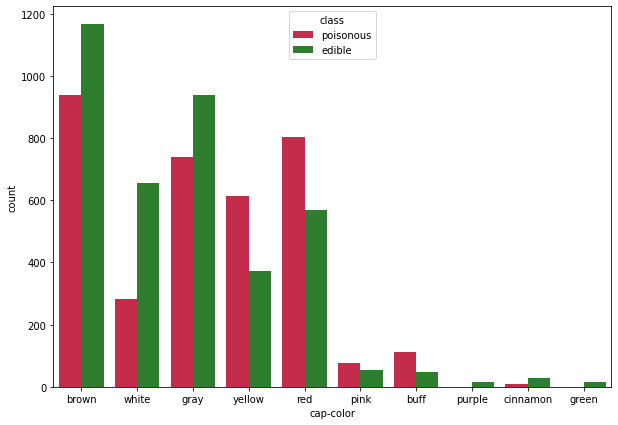

In [159]:
# cap-color counts with class hue 
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=df,x='cap-color',hue='class',palette=['#DC143C','#228B22'])

* Yellow, Red, Pink, and Buff cap colored mushrooms have more poisonous counts
* Brown, White, Gray, and Cinnamon cap colored mushrooms have more edible counts
* All Purple and Green cap mushrooms are edible 
* Brigth colors trend to be more poisonous than edible

### Cap-Shape Vs Class

<AxesSubplot:xlabel='count', ylabel='cap-shape'>

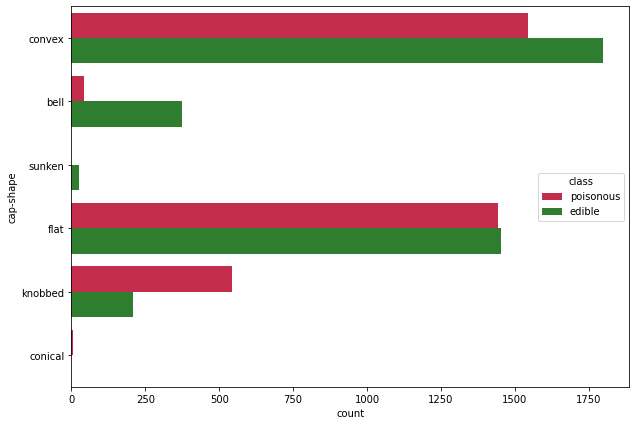

In [160]:
# gill-color counts with class hue 
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=df,y='cap-shape',hue='class',palette=['#DC143C','#228B22'])

* Bell cap mushrooms are mostly edible 
* Convex and flat cap mushrooms are mostly almost balanced 
* All Sunken cap mushrooms are edible 
* All conical cap mushrooms are poisonous 

If I decide to analyse all the traits it will not be effecient there must be a better way

###  Gills and Cap Colors vs Class

Lets use a catplot to show the relationships between the gill-colors and the cap-colors of mushrooms separating them by class

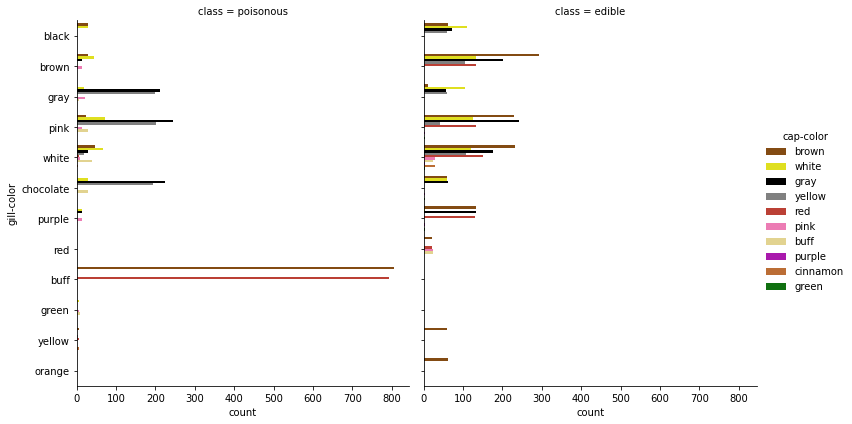

In [161]:

colors = ['#964B00','#FFFF00','#000000','#808080','#D22D1E','#FF69B4','#F0DC82','#C000C5','#D2691E','g']
sns.catplot(y="gill-color", hue="cap-color", col="class",
                data=df, kind="count",
                height=6, aspect=.9,palette=colors)

* It seems that there is a high chance to have a poisonous mushroom if it has red or brown cap color and aldo have buff color gills

## Change of Strategy

Although having the option to compare 2 attributes is helpful, it would be better to have some sort of numerical data to show the likeliness of an attribute to be poisonous.

Example would be given the gill-color attribute, the buff color has the highest % of being poisonous

Lets create a group between an attribute and count the number of occurences of unique values in comparison to edible and poisonous (class)

In [162]:
# Create Group
test = df.groupby('cap-color')['class'].value_counts()
print(test)
print(test.shape)
 

cap-color  class    
brown      edible       1166
           poisonous     940
buff       poisonous     111
           edible         47
cinnamon   edible         28
           poisonous      10
gray       edible        938
           poisonous     739
green      edible         14
pink       poisonous      77
           edible         54
purple     edible         15
red        poisonous     804
           edible        569
white      edible        655
           poisonous     282
yellow     poisonous     615
           edible        374
Name: class, dtype: int64
(18,)


That works, now the problem is that the dataframe has the shape(18,0)

Lets transform the data into a better daraframe

In [163]:
test = df.groupby('cap-color')['class'].value_counts().reset_index(name='count')
print(test)
print(test.shape)

   cap-color      class  count
0      brown     edible   1166
1      brown  poisonous    940
2       buff  poisonous    111
3       buff     edible     47
4   cinnamon     edible     28
5   cinnamon  poisonous     10
6       gray     edible    938
7       gray  poisonous    739
8      green     edible     14
9       pink  poisonous     77
10      pink     edible     54
11    purple     edible     15
12       red  poisonous    804
13       red     edible    569
14     white     edible    655
15     white  poisonous    282
16    yellow  poisonous    615
17    yellow     edible    374
(18, 3)


Awesome, we have a working dataframe!

To get the percentage we need to divide the poisonous value into the sum the edible and count values (if there are 2) if there is only one we know is either 100% poisonous or edible

First lets save all the occurences (1 or 2) into an array to use it later

In [164]:
test = df.groupby('cap-color')['class'].value_counts().reset_index(name='count')
print(test)
print(test.shape)
 
occurences = []
for atr in df['cap-color'].unique():
# if the number of attribute is 2 then it has a mix % else is 100% edible or poisonous
    if test[test == atr].count()[0] == 2:
        #print(f'double {atr}')
        occurences.append(atr)
        occurences.append(2)
    else:
        #print(f'unique {atr}')
        occurences.append(atr)
        occurences.append(1)
        
print(occurences)

   cap-color      class  count
0      brown     edible   1166
1      brown  poisonous    940
2       buff  poisonous    111
3       buff     edible     47
4   cinnamon     edible     28
5   cinnamon  poisonous     10
6       gray     edible    938
7       gray  poisonous    739
8      green     edible     14
9       pink  poisonous     77
10      pink     edible     54
11    purple     edible     15
12       red  poisonous    804
13       red     edible    569
14     white     edible    655
15     white  poisonous    282
16    yellow  poisonous    615
17    yellow     edible    374
(18, 3)
['brown', 2, 'white', 2, 'gray', 2, 'yellow', 2, 'red', 2, 'pink', 2, 'buff', 2, 'purple', 1, 'cinnamon', 2, 'green', 1]


Now just need to create an algorithm to:
* loop over the rows
* check the occurences
* verify the order of the class (sometimes edible is first and vice-versa)
* compute the percentage and print/save the values
* compare the results to the actual chart

   cap-color      class  count
0      brown     edible   1166
1      brown  poisonous    940
2       buff  poisonous    111
3       buff     edible     47
4   cinnamon     edible     28
5   cinnamon  poisonous     10
6       gray     edible    938
7       gray  poisonous    739
8      green     edible     14
9       pink  poisonous     77
10      pink     edible     54
11    purple     edible     15
12       red  poisonous    804
13       red     edible    569
14     white     edible    655
15     white  poisonous    282
16    yellow  poisonous    615
17    yellow     edible    374
['brown', 2, 'white', 2, 'gray', 2, 'yellow', 2, 'red', 2, 'pink', 2, 'buff', 2, 'purple', 1, 'cinnamon', 2, 'green', 1]
brown 44.63%
buff 70.25%
cinnamon 26.32%
gray 44.07%
green 0%
pink 58.78%
purple 0%
red 58.56%
white 30.1%
yellow 62.18%


<AxesSubplot:xlabel='cap-color', ylabel='count'>

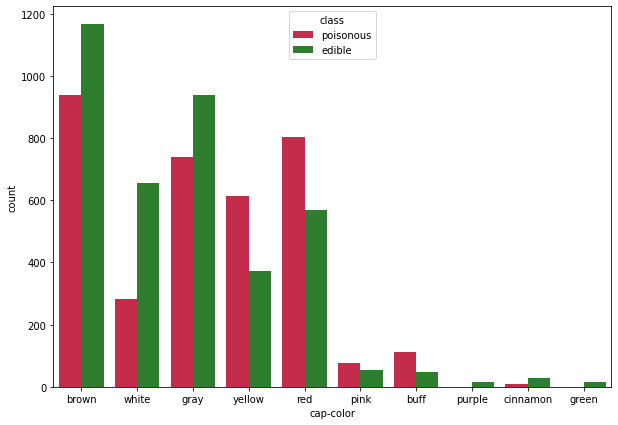

In [165]:
test = df.groupby('cap-color')['class'].value_counts().reset_index(name='count')
print(test)

occurences = []
for atr in df['cap-color'].unique():
# if the number of attribute is 2 then it has a mix % else is 100% edible or poisonous
    if test[test == atr].count()[0] == 2:
        #print(f'double {atr}')
        occurences.append(atr)
        occurences.append(2)
    else:
        #print(f'unique {atr}')
        occurences.append(atr)
        occurences.append(1)
        
print(occurences)

i = 0
while i < len(test.index):
    c = test.loc[i]['cap-color']
    num = occurences.index(c)
    # check occurences
    if occurences[num+1] == 2:
        # verify the order of the class
        if test.loc[i]['class'] == 'poisonous':
        #compute the percentage and print/save the values
            ptg = round(test.loc[i]['count'] / (test.loc[i]['count']+test.loc[i+1]['count']) * 100,2)
            print(f'{c} {ptg}%')
        else:
        #compute the percentage and print/save the values
            ptg = round(test.loc[i+1]['count'] / (test.loc[i+1]['count']+test.loc[i]['count']) * 100,2)
            print(f'{c} {ptg}%')
        i +=2
    # same process but we know the percentage is 100%
    elif occurences[num+1] == 1:
        if test.loc[i]['class'] == 'poisonous':
            ptg = 100
            print(f'{c} {ptg}%')
        else:
            ptg = 0
            print(f'{c} {ptg}%')
        i +=1
        
# cap-color counts with class hue 
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=df,x='cap-color',hue='class',palette=['#DC143C','#228B22'])
    




It seems that the approach is working. Now we need to create a function to generalize the algorithm and now we can check the chances of any property of all the attributes of being poisonous

The function should take the attribute name and display a chart with the info

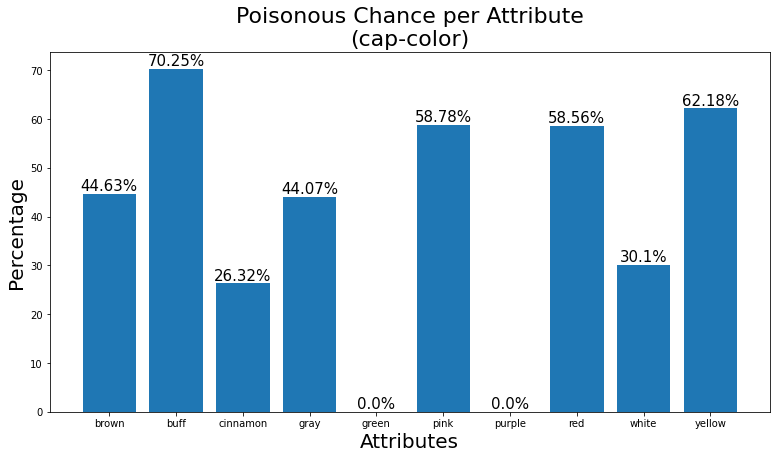

In [166]:
def poisonousPercentageByAttribute(attribute_):
    properties = []
    percentages = []
    group = df.groupby(attribute_)['class'].value_counts().reset_index(name='count')
    occurences = []
    
    for atr in df[attribute_].unique():
    # if the number of attribute is 2 then it has a mix % else is 100% edible or poisonous
        if group[group == atr].count()[0] == 2:
            #print(f'double {atr}')
            occurences.append(atr)
            occurences.append(2)
        else:
            #print(f'unique {atr}')
            occurences.append(atr)
            occurences.append(1)
    i = 0
    while i < len(group.index):
        c = group.loc[i][attribute_]
        num = occurences.index(c)
        #print(c, num,i)
        if occurences[num+1] == 2:
            if group.loc[i]['class'] == 'poisonous':
                ptg = round(group.loc[i]['count'] / (group.loc[i]['count']+group.loc[i+1]['count']) * 100,2)
                properties.append(c)
                percentages.append(ptg)
                #print(f'{c} {ptg}%')
            else:
                ptg = round(group.loc[i+1]['count'] / (group.loc[i+1]['count']+group.loc[i]['count']) * 100,2)
                properties.append(c)
                percentages.append(ptg)
                #print(f'{c} {ptg}%')
            i +=2
        elif occurences[num+1] == 1:
            if group.loc[i]['class'] == 'poisonous':
                ptg = 100
                properties.append(c)
                percentages.append(ptg)
                #print(f'{c} {ptg}%')
            else:
                ptg = 0
                properties.append(c)
                percentages.append(ptg)
                #print(f'{c} {ptg}%')
            i +=1

    # Get the required data
    attributes_ = properties
    variety = percentages

    # Create the plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    UniqueValuesPlot = ax.bar(attributes_,variety)


    # Add labels and title 
    ax.set_xlabel("Attributes",fontsize=20)
    ax.set_ylabel('Percentage',fontsize=20)
    ax.set_title(f'Poisonous Chance per Attribute\n({attribute_})',fontsize=22)

    # Auto-label the number of unique values for each bar.
    def autolabelpercentages(rects,fontsize=10):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            plt.annotate("{}%".format(height),(rect.get_x() + rect.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

    autolabelpercentages(UniqueValuesPlot) 
    plt.show()
    
# CALL THE FUNCTION !!
poisonousPercentageByAttribute('cap-color')

The function *poisonousPercentageByAttribute* displays a chart with the each of the chances of an attribute to be poisonous. 

Note: this approach works by ratios, so if any of the categories have a low amount of data it will be treated as the same of others with more data points

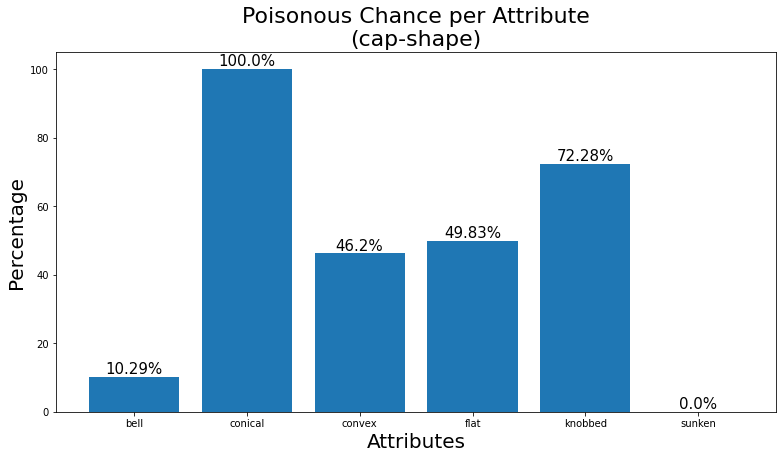

In [167]:
# Recheck cap-shape
poisonousPercentageByAttribute('cap-shape')

The function is working. Now we can speed up the process and ask better questions about the data. I will generalize the results by saving any value that is 100% or 0% and values with < 40% and > 60%

So far we know for certain based on the data that:

#### Edible
* All green, and purple color cap
    * 70% white, and cinnamon color cap
* All Sunken shape cap are edible 
    * 89.5% bell shape cap

#### Poisonous
* All conical shape cap
    * 72.3% knobbed shape cap
* 71.7% buff, 60.5% pink, yellow and red color cap

### Mushroom Odors

Lets check the odors!

Nature often adds foul smells to poisonous beings to stop then for being eaten. The expectation is to see all the foul-smelling mushrooms turn out as poisonous and the nice smells being edible.

* First lets see a count chart of all the possible odors and their relative count
* Then the poisonousPercentageByAttribute by odor

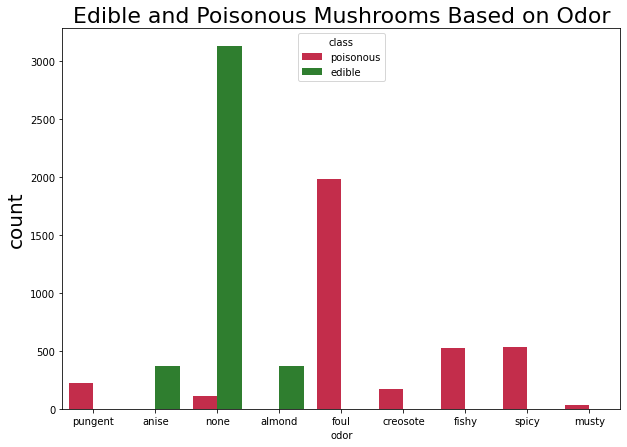

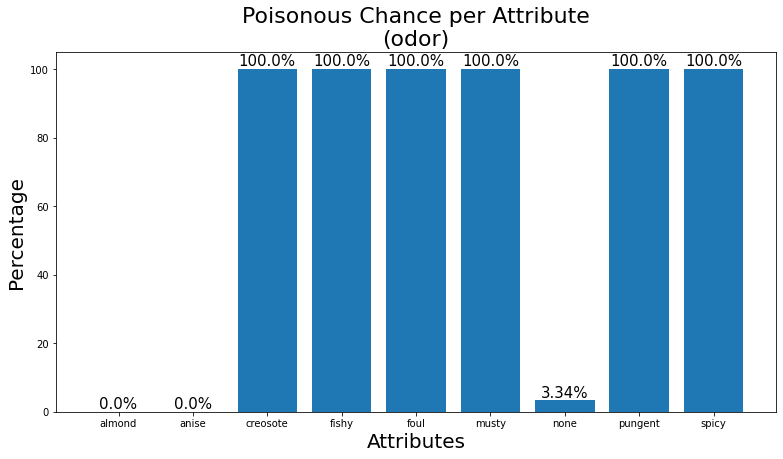

In [168]:
# cap-color counts with class hue 
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylabel('Odor',fontsize=20)
ax.set_title(f'Edible and Poisonous Mushrooms Based on Odor',fontsize=22)

sns.countplot(data=df,x='odor',hue='class',palette=['#DC143C','#228B22'])
poisonousPercentageByAttribute('odor')

*Mushroom Odors Results:* 

* As expected the foul smells: fishy, foul, pungent, spicy, etc are 100% poisonous
* The only "nice" odors the anise and almonds also followed the expectation by being 100% edible
* In general it seems that mushrooms with no smell are often edible with only 3.32% being poisonous

#### Edible
* All green, and purple color cap
    * 70% white, and cinnamon color cap
* All Sunken shape cap are edible 
    * 89.5% bell shape cap
* All "Nice" smelling (almond, anise)
    * Most none smelling (~97%)

#### Poisonous
* All conical shape cap
    * 72.3% knobbed shape cap
* 71.7% buff, 60.5% pink, yellow and red color cap
* All "Foul" smelling (fishy,foul,musty,...)


### Other Color Attributes

Gill-color check: based on the results with the caps I expect the gill colors to diplay poisonous with bright colors and edible with soft colors

spore-print-color: The spore print is the mark that the mushrooms leave on a white piece of paper when the cap is put on top for a few hours. The spores fall from the gills. I have no idea of what the results could be.



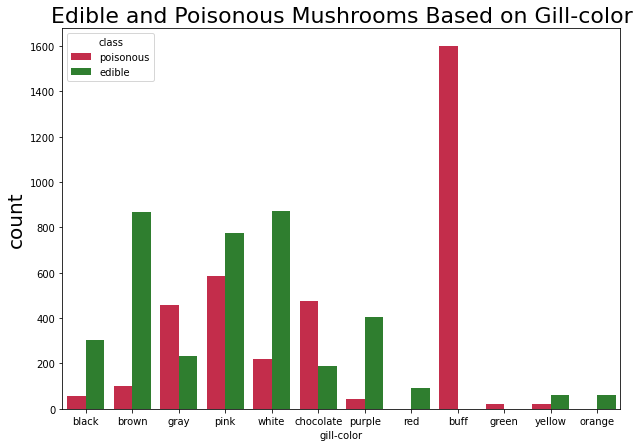

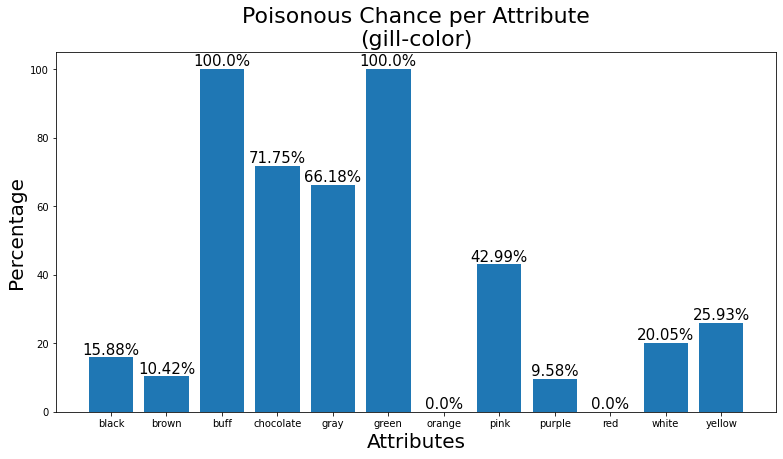

In [169]:
# Gill-color check with class hue 
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylabel('gill-color',fontsize=20)
ax.set_title(f'Edible and Poisonous Mushrooms Based on Gill-color',fontsize=22)

sns.countplot(data=df,x='gill-color',hue='class',palette=['#DC143C','#228B22'])
poisonousPercentageByAttribute('gill-color')


*Mushroom Gill-color Results:* 

* Quite surprisingly it seems to be a total inverse between cap color and gills color. 
* The gill color green that in caps signifies all edible, now signifies all poisonous in gills.
* Bright colors like red, orange, yellow in gills are now mostly edible


#### Edible
* All green, and purple color cap
    * 70% white, and cinnamon color cap
* All Sunken shape cap are edible 
    * 89.5% bell shape cap
* All "Nice" smelling (almond, anise)
    * Most none smelling (~97%)
* All orange, and red gill color
    * 88.4% black, brown, purple, and 77.5% white, yellow gill color

#### Poisonous
* All conical shape cap
    * 72.3% knobbed shape cap
* 71.7% buff, 60.5% pink, yellow and red color cap
* All "Foul" smelling (fishy,foul,musty,...)
* All buff, green gill colors
    * 69.8% chocolate and gray gill color

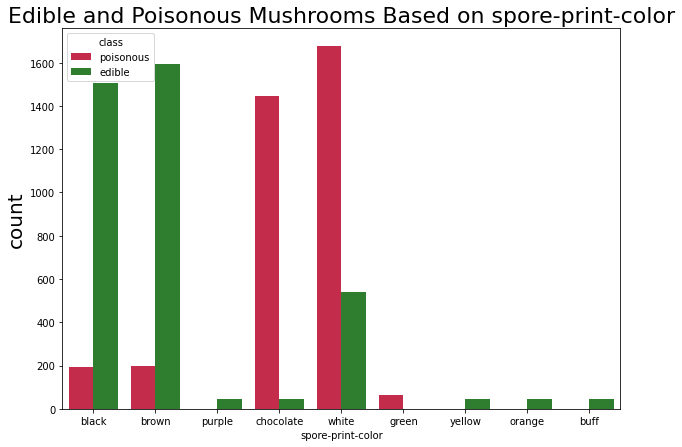

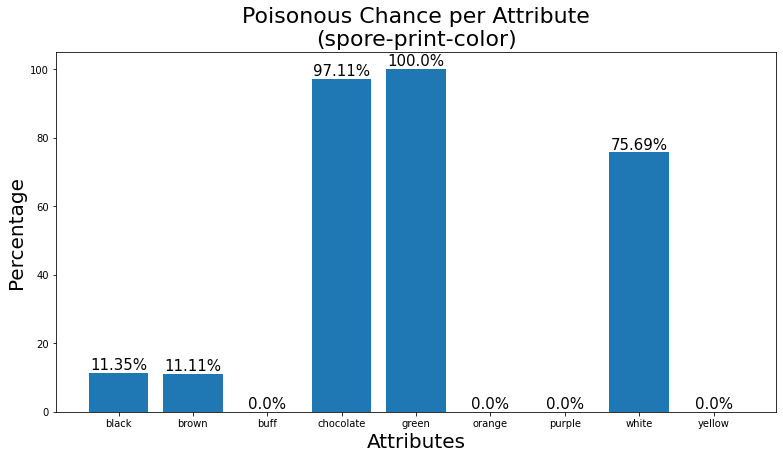

In [170]:
# Gill-color check with class hue 
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylabel('spore print color',fontsize=20)
ax.set_title(f'Edible and Poisonous Mushrooms Based on spore-print-color',fontsize=22)

sns.countplot(data=df,x='spore-print-color',hue='class',palette=['#DC143C','#228B22'])
poisonousPercentageByAttribute('spore-print-color')

*Spore print color*:

* Following the trend of the gill colors bright colors seems edible
* Data is more skewed this time. It seems that is or very probably edible or very probably poisonous
* We can generalize the relationship between spore print color and gill colors by saying its the same but the white color is exchanged from being mostly edible in gills to mostly poisonous in spore prints 


#### Edible
* All green, and purple color cap
    * 70% white, and cinnamon color cap
* All Sunken shape cap are edible 
    * 89.5% bell shape cap
* All "Nice" smelling (almond, anise)
    * Most none smelling (~97%)
* All orange, and red gill color
    * 88.4% black, brown, purple, and 77.5% white, yellow gill color
* All buff, orange, purple and yellow spore-prints
    * 88% black and brown spore prints

#### Poisonous
* All conical shape cap
    * 72.3% knobbed shape cap
* 71.7% buff, 60.5% pink, yellow and red color cap
* All "Foul" smelling (fishy,foul,musty,...)
* All buff, green gill colors
    * 69.8% chocolate and gray gill color
* All chocolate and green spore-prints
    * 75.8% white spore prints
    
### Stalks shape, color above/below ring, surface above/below, shape

Going to explore and expection to have the colors falls in either the cap color section or the gills/spore-prints section

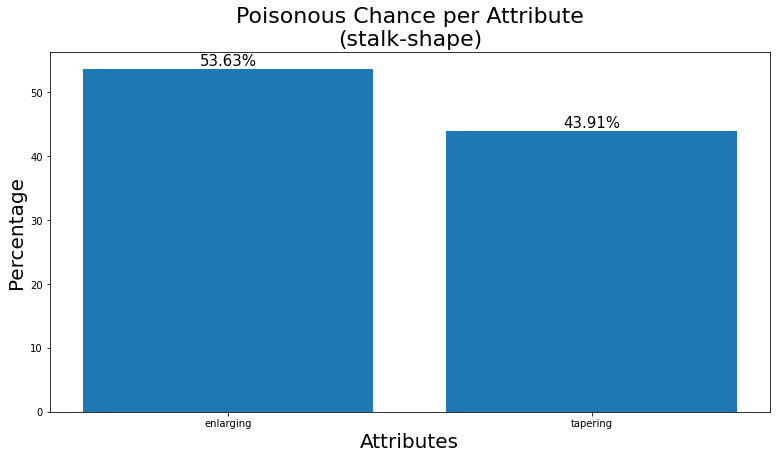

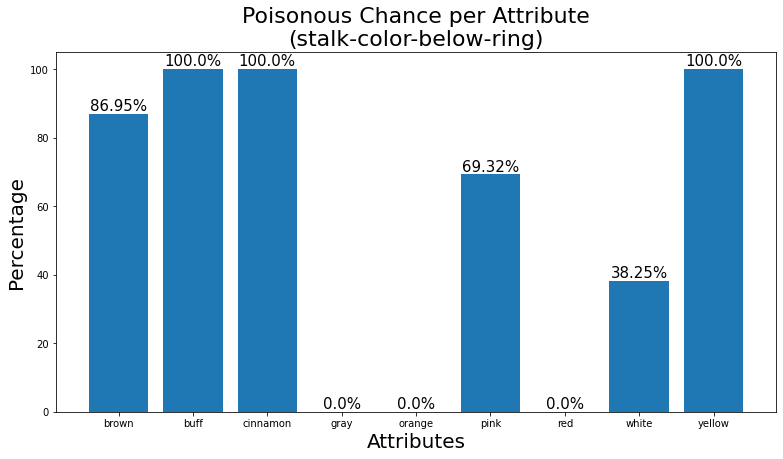

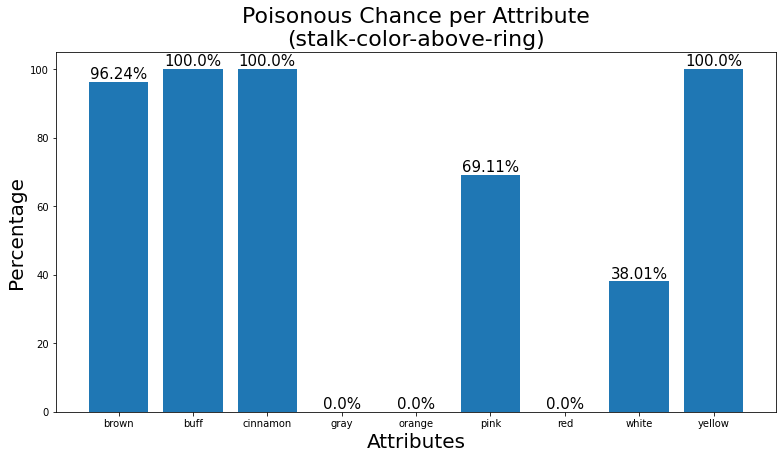

In [171]:
poisonousPercentageByAttribute('stalk-shape')
poisonousPercentageByAttribute('stalk-color-below-ring')
poisonousPercentageByAttribute('stalk-color-above-ring')

* Stalk-shape is very balanced so no info can be derived from it
* Stalk color above and under the ring can be generalized into the same
* It seems it follows the neither the cap color trend by having bright colors like yellow and pink as always poisonous and orange, red as never poisonous. Stalk colors is now a new category

#### Edible
* All green, and purple color cap
    * 70% white, and cinnamon color cap
* All Sunken shape cap are edible 
    * 89.5% bell shape cap
* All "Nice" smelling (almond, anise)
    * Most none smelling (~97%)
* All orange, and red gill color
    * 88.4% black, brown, purple, and 77.5% white, yellow gill color
* All buff, orange, purple and yellow spore-prints
    * 88% black and brown spore prints
* All gray, orange, red stalk color
    * 61.7% white stalk color

#### Poisonous
* All conical shape cap
    * 72.3% knobbed shape cap
* 71.7% buff, 60.5% pink, yellow and red color cap
* All "Foul" smelling (fishy,foul,musty,...)
* All buff, green gill colors
    * 69.8% chocolate and gray gill color
* All chocolate and green spore-prints
    * 75.8% white spore prints
* All brown, buff, cinnamon, yellow stalks color
    * 69.5% pink stalk color
    

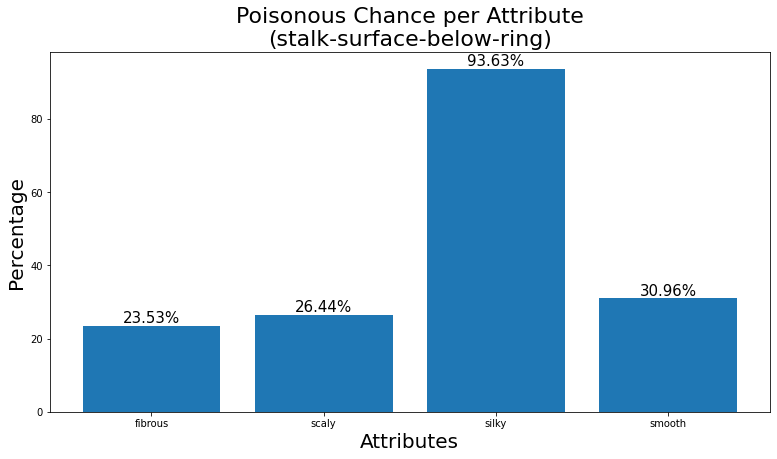

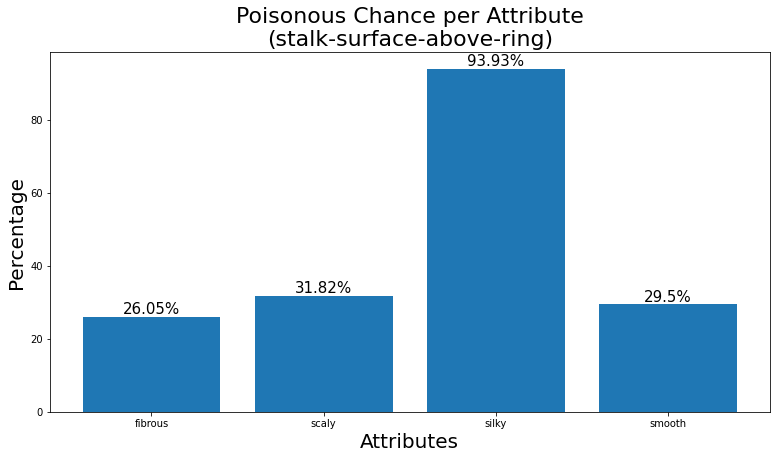

In [172]:
poisonousPercentageByAttribute('stalk-surface-below-ring')
poisonousPercentageByAttribute('stalk-surface-above-ring')

* Stalk surface above and under the ring can be generalized into the same
* With 94% of silky mushrooms being poisonous and the other categories staying relatively at the same amount it seems that we can avoid adding a mostly for the non-silky categories and add ~27% average


#### Edible
* All green, and purple color cap
    * 70% white, and cinnamon color cap
* All Sunken shape cap are edible 
    * 89.5% bell shape cap
* All "Nice" smelling (almond, anise)
    * Most none smelling (~97%)
* All orange, and red gill color
    * 88.4% black, brown, purple, and 77.5% white, yellow gill color
* All buff, orange, purple and yellow spore-prints
    * 88% black and brown spore prints
* All gray, orange, red stalk color
    * 61.7% white stalk color
* ~73% fibrous, scaly, and smooth stalks shapes

#### Poisonous
* All conical shape cap
    * 72.3% knobbed shape cap
* 71.7% buff, 60.5% pink, yellow and red color cap
* All "Foul" smelling (fishy,foul,musty,...)
* All buff, green gill colors
    * 69.8% chocolate and gray gill color
* All chocolate and green spore-prints
    * 75.8% white spore prints
* All brown, buff, cinnamon, yellow stalks color
    * 69.5% pink stalk color
* All silky stalk shape


### Check the attributes that only have 2 unique values

#### Bruises, gill-attachement/spacing/size

* Create a function that creates a pie plot per attribution to quickly analyze attributes that have only two unique values
* First plot 2 charts one beside another
* Create the function

yellow
[3077, 4361]


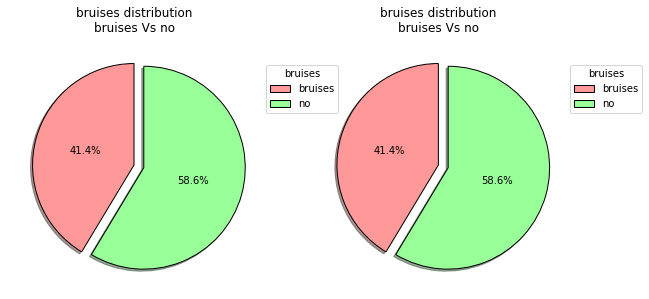

In [173]:
# Double pie chart
# General
colors = ['#ff9999','#99ff99']
explode = (0, 0.1)
# Specify subplots
fig, ax = plt.subplots(1,2)
attribute_ = 'bruises'
# Get unique values for the given attribute
uniqueValues= df[attribute_].unique()
if len(uniqueValues) > 2:
    print("More than 2 unique values")
    #return
print(c)

# Set the labels and get the respective data
labels = uniqueValues
count = [len(df[df[attribute_] == uniqueValues[0]]),len(df[df[attribute_] == uniqueValues[1]])]

print(count)

# Create the plots
ax[0].pie(count, colors=colors, 
        explode=explode, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.1f%%', 
        shadow=True,
        startangle=90,
        pctdistance=0.5)
ax[0].set_title(f"{attribute_} distribution\n{uniqueValues[0]} Vs {uniqueValues[1]}")
ax[0].legend(labels,
          title="bruises",
          loc="center left",
          bbox_to_anchor=(1, 0.3, 1, 1))


ax[1].pie(count, colors=colors, 
        explode=explode, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.1f%%', 
        shadow=True,
        startangle=90,
        pctdistance=0.5)
ax[1].set_title(f"{attribute_} distribution\n{uniqueValues[0]} Vs {uniqueValues[1]}")
ax[1].legend(labels,
          title="bruises",
          loc="center left",
          bbox_to_anchor=(1, 0.3, 1, 1))


plt.show()

Now generalize the code to work for n attributes and clean up.

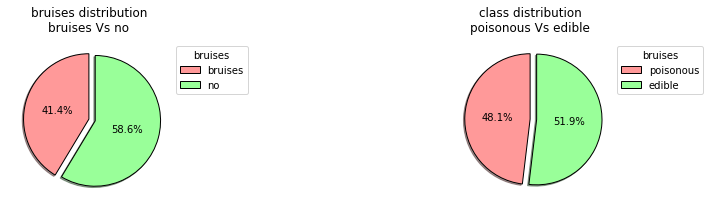

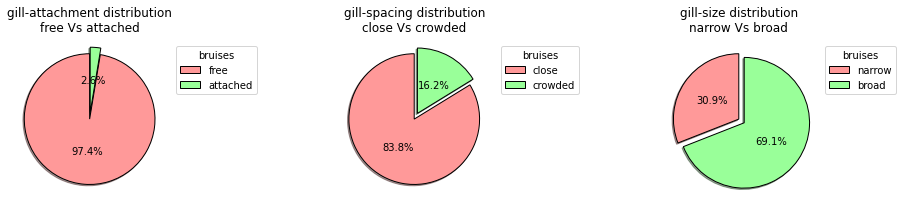

In [174]:

def customPieTwoUniqueValues(attribute_):
    # General parameters for plots
    colors = ['#ff9999','#99ff99']
    explode = (0, 0.1)
    fig, ax = plt.subplots(1,len(attribute_),figsize=(14, 3))
    plots = []
    
    for i in range(0,len(attribute_)):
        # get the unique values
        uniqueValues= df[attribute_[i]].unique()
        if len(uniqueValues) > 2:
            print("More than 2 unique values")
            return

        labels = uniqueValues
        count = [len(df[df[attribute_[i]] == uniqueValues[0]]),len(df[df[attribute_[i]] == uniqueValues[1]])]

        ax[i].pie(count, colors=colors, 
                explode=explode, 
                wedgeprops={'edgecolor': 'black'}, 
                autopct='%1.1f%%', 
                shadow=True,
                startangle=90,
                pctdistance=0.5)
        ax[i].set_title(f"{attribute_[i]} distribution\n{uniqueValues[0]} Vs {uniqueValues[1]}")
        ax[i].legend(labels,
                  title="bruises",
                  loc="center left",
                  bbox_to_anchor=(1, 0.3, 1, 1))
        plots.append(ax[0])
        

    plt.tight_layout()
    plt.show()
    
customPieTwoUniqueValues(['bruises','class'])
customPieTwoUniqueValues(['gill-attachment','gill-spacing', 'gill-size'])

### gill-attachement/spacing/size analysis

With the pie plots and the count plots by class we can determine realtions fast.

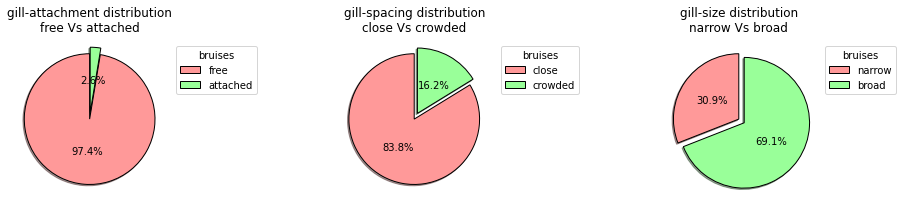

<AxesSubplot:xlabel='gill-size', ylabel='count'>

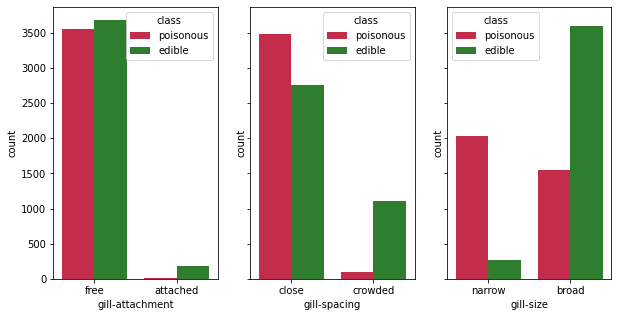

In [175]:
# Gill-color check with class hue 
customPieTwoUniqueValues(['gill-attachment','gill-spacing', 'gill-size'])
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(data=df,x='gill-attachment',hue='class',palette=['#DC143C','#228B22'],ax=ax1)
sns.countplot(data=df,x='gill-spacing',hue='class',palette=['#DC143C','#228B22'],ax=ax2)
sns.countplot(data=df,x='gill-size',hue='class',palette=['#DC143C','#228B22'],ax=ax3)



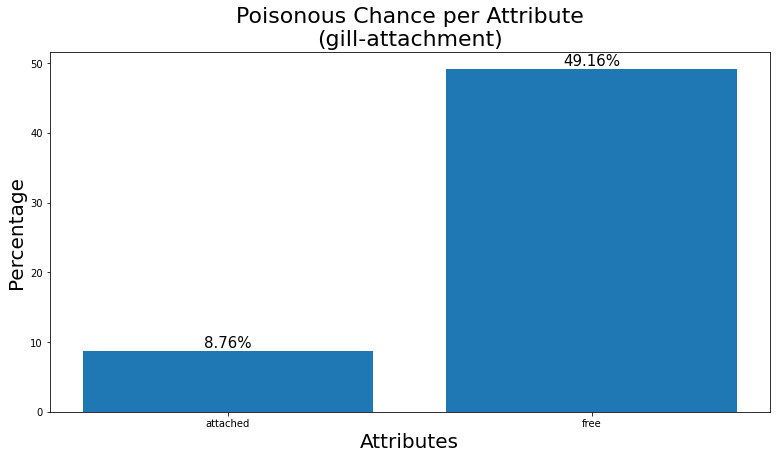

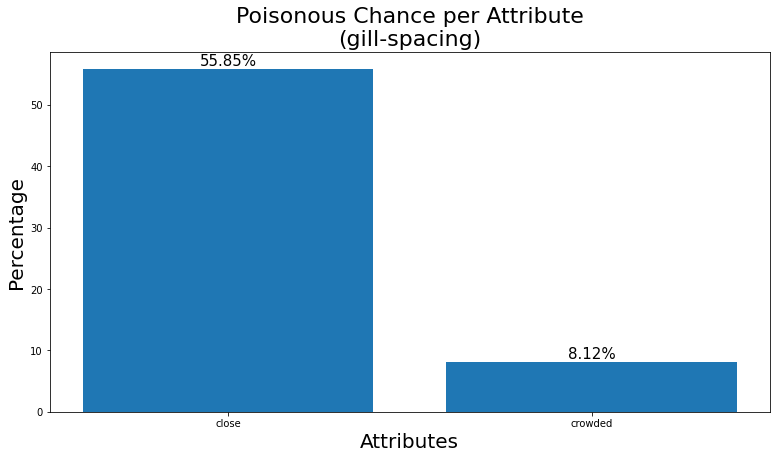

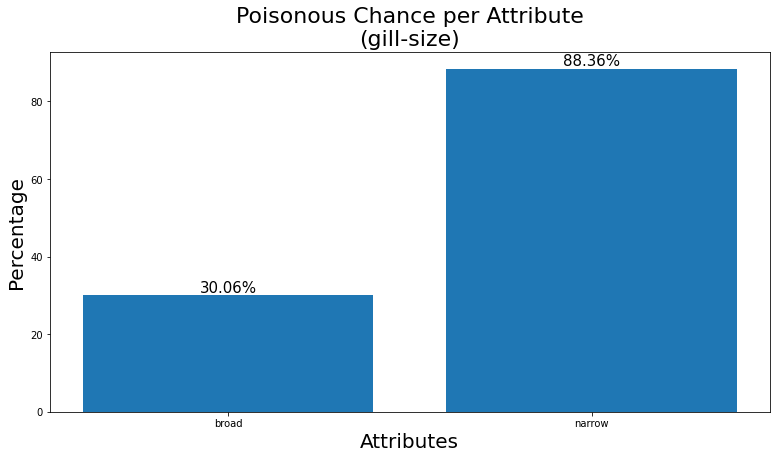

In [176]:
poisonousPercentageByAttribute('gill-attachment')
poisonousPercentageByAttribute('gill-spacing')
poisonousPercentageByAttribute('gill-size')

*results:* 
* No conclusion based on gill-attachement as free is balanced and attached only represents 2.7% of all the mushrooms
* 91.4% crowded gill-spaced are edible 
* 88.4% narrow gill-size are poisonous

## Conclusions

* The attributes with more variations are the ones based on color plus an unexpected outlier, the odor.
* Most brigth colors in the caps are related to poisonous meanwhile soft colors are edible
* The gill and print colors relationship based on edibleness is inverse in relation to the cap color
* Nice smelling mushrooms are always edible while foul ones are poisonous

## Mushroom Foraging Summary 

### Edible Attributes

* All green, and purple color cap
    * 70% white, and cinnamon color cap
* All Sunken shape cap are edible 
    - 89.5% bell shape cap
* All "Nice" smelling (almond, anise)
    - Most none smelling (~97%)
* All orange, and red gill color
    - 88.4% black, brown, purple, and 77.5% white, yellow gill color
* All buff, orange, purple and yellow spore-prints
    - 88% black and brown spore prints
* All gray, orange, red stalk color
    - 61.7% white stalk color
* ~73% fibrous, scaly, and smooth stalks shapes
* 91.4% crowded gill-spaced are edible 

### Poisonous Attributes
* All conical shape cap
    * 72.3% knobbed shape cap
* 71.7% buff, 60.5% pink, yellow and red color cap
* All "Foul" smelling (fishy,foul,musty,...)
* All buff, green gill colors
    * 69.8% chocolate and gray gill color
* All chocolate and green spore-prints
    * 75.8% white spore prints
* All brown, buff, cinnamon, yellow stalks color
    * 69.5% pink stalk color
* All silky stalk shape
* 88.4% narrow gill-size are poisonous

#### Flaws

* The poisonous chance plot function uses rates, if the data is not balanced or vastly one-sided it will not portray the best representative values

### Resources Used:

* https://en.wikipedia.org/wiki/Mushroom#classification
* http://www.ikonet.com/en/visualdictionary/static/us/edible_mushrooms#:~:text=There%20are%20over%2050%2C000%20species,used%20for%20their%20medicinal%20properties.
* https://www.kaggle.com/uciml/mushroom-classification
* https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
* https://seaborn.pydata.org/tutorial/categorical.html#showing-multiple-relationships-with-facets
* https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

